# Linear Regression 

#### Importing/Loading files/Libraries

In [106]:
#Necessary Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#Addtional Necessary Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
labelencoder = LabelEncoder()

In [17]:
#Importing important files and libraries required to perform the following assignment

#### Load Data

In [18]:
path = 'StudentsPerformance.csv'
df = pd.read_csv(path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
#The data file (.csv) is extracted in-order to perform linear regression

In [20]:
#Checking for shapes (Veiwing number of value is (R, C))
df.shape

(1000, 8)

In [21]:
#Table information
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [22]:
#Table information/description
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Data Tuning/Data preprocessing

In [23]:
#Checking for nulls in the data
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

###### The data was checked in-order to find the anomalies, but the dataset contains no anomalies, so the researcher concludes from the result generated above that the dataset has no nulls and the dataset is clean

In [24]:
df.rename(columns = {"race/ethnicity" : "race_ethnicity","parental level of education":"parental_level_of_education", 
                      "test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score",
                      "writing score":"writing_score", },inplace=True)

###### Renaming the columns in-order to make the inconsistency of the naming consistent and making the columns easier to read and avoid mistakes.

#### One Hot Encode

In [25]:
df.gender = pd.Categorical(df.gender)
df.race_ethnicity = pd.Categorical(df.race_ethnicity)
df.parental_level_of_education = pd.Categorical(df.parental_level_of_education)
df.lunch = pd.Categorical(df.lunch)
df.test_preparation_course  = pd.Categorical(df.test_preparation_course)

###### Performing hot-label-encoding, because the linear regression requires numerical data, the problem is, our data has alphabetical values, so we need to perform one hot label encoding to remove the discrapanices make the data which is in alphebitcal to numerical, for e.g. the data such as gender to 0's and 1's for us to properly generate relationship in latter section.

In [26]:
df2 = pd.DataFrame(df["gender"])
df2['gender_cat'] = labelencoder.fit_transform(df2["gender"])
df2

,gender,gender_cat
0,female,0
1,female,0
2,female,0
3,male,1
4,male,1
...,...,...
995,female,0
996,male,1
997,female,0
998,female,0


In [27]:
#performing encoding on gender

In [28]:
df2["gender"].append(df2["gender_cat"]).unique()

array(['female', 'male', 0, 1], dtype=object)

In [29]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df2[['gender_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "female",1: "male"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0


In [30]:
df2 = pd.DataFrame(df["race_ethnicity"])
df2['race_ethnicity_cat'] = labelencoder.fit_transform(df2["race_ethnicity"])
df2

,race_ethnicity,race_ethnicity_cat
0,group B,1
1,group C,2
2,group B,1
3,group A,0
4,group C,2
...,...,...
995,group E,4
996,group C,2
997,group C,2
998,group D,3


In [31]:
#performing encoding on race_ethinicity

In [32]:
df2["race_ethnicity"].append(df2["race_ethnicity_cat"]).unique()

array(['group B', 'group C', 'group A', 'group D', 'group E', 1, 2, 0, 3,
       4], dtype=object)

In [33]:
enc_df = pd.DataFrame(enc.fit_transform(df2[['race_ethnicity_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "group_A",1: "group_B", 2 : "group_C", 3 : "group_D", 4 : "group_E"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male,group_A,group_B,group_C,group_D,group_E
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [34]:
df2 = pd.DataFrame(df["parental_level_of_education"])
df2['parental_level_of_education_cat'] = labelencoder.fit_transform(df2["parental_level_of_education"])
df2

,parental_level_of_education,parental_level_of_education_cat
0,bachelor's degree,1
1,some college,4
2,master's degree,3
3,associate's degree,0
4,some college,4
...,...,...
995,master's degree,3
996,high school,2
997,high school,2
998,some college,4


In [35]:
#performing encoding on parental_level_of_education

In [36]:
df2["parental_level_of_education"].append(df2["parental_level_of_education_cat"]).unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', 1, 4, 3,
       0, 2, 5], dtype=object)

In [37]:
enc_df = pd.DataFrame(enc.fit_transform(df2[['parental_level_of_education_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "associate's_degree",1: "bachelor's_degree", 2 : "high_school", 3 : "master's_degree", 4 : "some_college",
                                 5 : "some_high_school"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male,...,group_B,group_C,group_D,group_E,associate's_degree,bachelor's_degree,high_school,master's_degree,some_college,some_high_school
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
df2 = pd.DataFrame(df["lunch"])
df2['lunch_cat'] = labelencoder.fit_transform(df2["lunch"])
df2

,lunch,lunch_cat
0,standard,1
1,standard,1
2,standard,1
3,free/reduced,0
4,standard,1
...,...,...
995,standard,1
996,free/reduced,0
997,free/reduced,0
998,standard,1


In [39]:
df2["lunch"].append(df2["lunch_cat"]).unique()

array(['standard', 'free/reduced', 1, 0], dtype=object)

In [40]:
#performing encoding on lunch

In [41]:
enc_df = pd.DataFrame(enc.fit_transform(df2[['lunch_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "free-reduced",1: "standard"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male,...,group_D,group_E,associate's_degree,bachelor's_degree,high_school,master's_degree,some_college,some_high_school,free-reduced,standard
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
df2 = pd.DataFrame(df["test_preparation_course"])
df2['test_preparation_course_cat'] = labelencoder.fit_transform(df2["test_preparation_course"])
df2

,test_preparation_course,test_preparation_course_cat
0,none,1
1,completed,0
2,none,1
3,none,1
4,none,1
...,...,...
995,completed,0
996,none,1
997,completed,0
998,completed,0


In [43]:
df2["test_preparation_course"].append(df2["test_preparation_course_cat"]).unique()

array(['none', 'completed', 1, 0], dtype=object)

In [44]:
#performing encoding on test_preparation_course

In [45]:
enc_df = pd.DataFrame(enc.fit_transform(df2[['test_preparation_course_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "completed",1: "none"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male,...,associate's_degree,bachelor's_degree,high_school,master's_degree,some_college,some_high_school,free-reduced,standard,completed,none
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [46]:
#Descrbing the data and rechecking the encoding

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
female,1000.0,0.518,0.499926,0.0,0.00,1.0,1.0,1.0
male,1000.0,0.482,0.499926,0.0,0.00,0.0,1.0,1.0
group_A,1000.0,0.089,0.284886,0.0,0.00,0.0,0.0,1.0
group_B,1000.0,0.190,0.392497,0.0,0.00,0.0,0.0,1.0
group_C,1000.0,0.319,0.466322,0.0,0.00,0.0,1.0,1.0
group_D,1000.0,0.262,0.439943,0.0,0.00,0.0,1.0,1.0
group_E,1000.0,0.140,0.347161,0.0,0.00,0.0,0.0,1.0


In [48]:
#Developing and checking the correlation between the elements through the graph
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,math_score,reading_score,writing_score,female,male,group_A,group_B,group_C,group_D,group_E,associate's_degree,bachelor's_degree,high_school,master's_degree,some_college,some_high_school,free-reduced,standard,completed,none
math_score,1.000,0.818,0.803,-0.168,0.168,-0.092,-0.084,-0.073,0.050,0.206,0.063,0.080,-0.129,0.060,0.037,-0.080,-0.351,0.351,0.178,-0.178
reading_score,0.818,1.000,0.955,0.244,-0.244,-0.096,-0.060,-0.003,0.035,0.107,0.064,0.096,-0.151,0.106,0.011,-0.071,-0.230,0.230,0.242,-0.242
writing_score,0.803,0.955,1.000,0.301,-0.301,-0.111,-0.078,-0.010,0.082,0.089,0.065,0.128,-0.182,0.126,0.028,-0.097,-0.246,0.246,0.313,-0.313
female,-0.168,0.244,0.301,1.000,-1.000,-0.071,0.028,0.063,-0.031,-0.020,0.005,0.012,-0.038,0.046,0.004,-0.009,0.021,-0.021,-0.006,0.006
male,0.168,-0.244,-0.301,-1.000,1.000,0.071,-0.028,-0.063,0.031,0.020,-0.005,-0.012,0.038,-0.046,-0.004,0.009,-0.021,0.021,0.006,-0.006
group_A,-0.092,-0.096,-0.111,-0.071,0.071,1.000,-0.151,-0.214,-0.186,-0.126,-0.049,0.016,0.005,-0.034,-0.018,0.074,0.032,-0.032,-0.006,0.006
group_B,-0.084,-0.060,-0.078,0.028,-0.028,-0.151,1.000,-0.331,-0.289,-0.195,-0.007,-0.019,0.069,-0.056,-0.036,0.027,0.008,-0.008,-0.000,0.000
group_C,-0.073,-0.003,-0.010,0.063,-0.063,-0.214,-0.331,1.000,-0.408,-0.276,0.037,0.016,0.008,0.002,-0.016,-0.045,0.003,-0.003,0.013,-0.013
group_D,0.050,0.035,0.082,-0.031,0.031,-0.186,-0.289,-0.408,1.000,-0.240,-0.045,-0.021,-0.042,0.073,0.042,0.018,0.009,-0.009,-0.056,0.056
group_E,0.206,0.107,0.089,-0.020,0.020,-0.126,-0.195,-0.276,-0.240,1.000,0.055,0.013,-0.039,-0.003,0.023,-0.053,-0.052,0.052,0.059,-0.059


### Performing Linear Regression
#### Predicting Math score

In [49]:
#Taking values from the tables, whole row and column between 6 and 7
#Taking values from the table, whole row and values of column 5

In [50]:
x = df.iloc[:, 6:7].values
y = df.iloc[:, 5].values

In [51]:
#Testing and training the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 34)

In [52]:
#Formulating R score
#Linear regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
print("R score: {0}".format(round(linear_regressor.score(x_train, y_train),2)))

R score: 0.67


The R score is 0.67, which is good but not excellent. The R score is also known as coefficient of determination and helps to calculate regression score

In [53]:
print("Intercept: {0}".format(round(linear_regressor.intercept_),))
#pd.DataFrame({'feature':x.columns, 'coef':linear_regressor.coef_})

Intercept: 8.0


In [54]:
#Performing prediction

In [76]:
y_predictions = linear_regressor.predict(x_test)

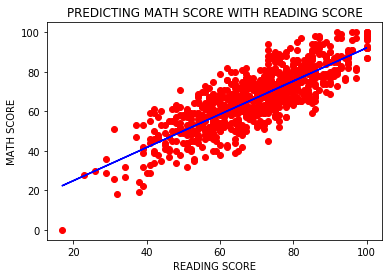

In [77]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, linear_regressor.predict(x_train), color = "blue")
plt.title("PREDICTING MATH SCORE WITH READING SCORE")
plt.xlabel("READING SCORE")
plt.ylabel("MATH SCORE")
#plt.savefig('basic_linear_regression.png')
plt.show()

###### The math score are in linear function, the math score directly proportional to reading score, which means that if the student spend more time reading about the math, his/her marks gradually increases.

In [78]:
mae = mean_absolute_error(linear_regressor.predict(x_test), y_test)
mse = mean_squared_error(linear_regressor.predict(x_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 7.50
Mean Squared Error (MSE): 84.92
Root Mean Squared Error (RMSE): 9.22


###### Performing prediction for math score, we have found that the MAE, MSE, and RMSE are 7.50, 84.92 and 9.22 respectively

In [81]:
linear_regressor.fit(x_train, y_train)
print("R score: {0}".format(round(linear_regressor.score(x_train, y_train),2)))

R score: 0.67


###### The testing and traing the datam and model.fit.

In [82]:
print("Intercept: {0}".format(round(linear_regressor.intercept_),))
#pd.DataFrame({'feature':X.columns, 'coef':linear_regressor.coef_})

Intercept: 8.0


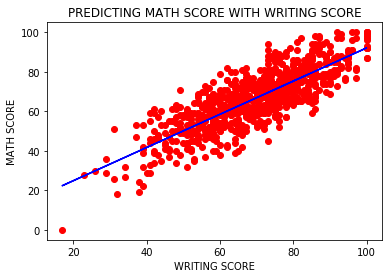

In [85]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, linear_regressor.predict(x_train), color = "blue")
plt.title("PREDICTING MATH SCORE WITH WRITING SCORE")
plt.xlabel("WRITING SCORE")
plt.ylabel("MATH SCORE")
#plt.savefig('basic_linear_regression.png')
plt.show()

###### The math score are in linear function, the math score directly proportional to writing score, which means that if the student spend more time writing and practicing the math, his/her marks gradually increases.

In [88]:
mae = mean_absolute_error(linear_regressor.predict(x_test), y_test)
mse = mean_squared_error(linear_regressor.predict(x_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 7.50
Mean Squared Error (MSE): 84.92
Root Mean Squared Error (RMSE): 9.22


In [89]:
#Performing grid search meta parameter, in-order recommend the best validate score

In [90]:
from sklearn.model_selection import GridSearchCV

In [93]:
#Stochostic Gradient Decent(SGD) for linear regressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
model2 = SGDRegressor()
model2.fit(x_train, y_train)


y_pred2 = model2.predict(x_test)

MSE = mean_squared_error(y_test, y_pred2)
print("Mean squared error: %.2f" % mse)

print("Coefficient: \n", model2.coef_)
print("Y_intercept", model2.intercept_)

Mean squared error: 84.92
Coefficient: 
 [-2.12568862e+10]
Y_intercept [1.19547727e+10]


###### The score is 84.79, which is similar to the linear regression and has no significant improvement from previous method

In [95]:
#Stochostic Gradient Decent(SGD) for linear regressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
model2 = SGDRegressor(random_state = 5, max_iter = 10000, alpha = 0.1)


#model2.fit(X_train, y_train)
#R2 = model2.score(X_test, y_test)
#print("R-squared: %.4f" % rmse)


model2.fit(x_train, y_train)


y_pred2 = model2.predict(x_test)

MSE = mean_squared_error(y_test, y_pred2)
print("Mean square error: %.2f" % mse)

print("Coefficient: \n", model2.coef_)
print("Y_intercept", model2.intercept_)

Mean square error: 84.92
Coefficient: 
 [-2.47327162e+10]
Y_intercept [1.43227919e+10]


In [96]:
#Performing Grid Search with different parameters, we user squared_loss, hubris parameters for loss function, and l2,l1 and elasticnet from penalty
#Setting the maximum iteration from 5000 until 20,000 and using alpha paprameters

In [98]:
from sklearn.model_selection import GridSearchCV

parameters = {'loss':('squared_loss', 'huber'), 'penalty':('l2','l1','elasticnet'),
              'alpha':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1],
              'max_iter':[5000,10000,20000]}
model3 = SGDRegressor(random_state = 5)

clf = GridSearchCV(model3, parameters)

clf.fit(x_train, y_train)
clf.best_params_

{'alpha': 0.0001, 'loss': 'huber', 'max_iter': 5000, 'penalty': 'elasticnet'}

In [166]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
model5 = SGDRegressor(alpha=1, loss='squared_loss', max_iter=20000, penalty='l2', random_state = 5)
model5.fit(x_train, y_train)

y_pred2 = model5.predict(x_test)

MSE = mean_squared_error(y_test, y_pred2)
print("Mean squared error: %.2f" % mse)

R2 = model5.score(x_test, y_pred2)
print("R-squared: %.4f" % R2)

print("Coefficients: \n", linear_regressor.coef_)
print("y_intercept", model5.intercept_)

Mean squared error: 84.92
R-squared: 1.0000
Coefficients: 
 [0.83996708]
y_intercept [2.78942491e+10]


###### The r-squared has increased from 0.67 to 0.89, which is a significant improvement, the prediction and applying the grid search algorithm in-order to find the best score has been proen to be successful.

###### Although the MSE remains constant at 84.79

######  The MSE remains the same across different parameter testing which is 84.79

In [101]:
clf.best_params_

{'alpha': 0.0001, 'loss': 'huber', 'max_iter': 5000, 'penalty': 'elasticnet'}

###### The best parameter for our dataset and analysing the best output is considered to be alpha: 0.001, loss: "huber", the max_iter: 5000 and the penalty is elasticnet, the hyperparameters.

In [102]:
clf.estimator.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [103]:
clf.best_estimator_.coef_

array([0.9540467])

In [104]:
clf.best_score_

0.6388443427652517

In [105]:
clf.best_estimator_.intercept_

array([0.06027118])

## In Conclusion
The linear regression was able to yield the output score MSE, approximately 84.79 and R-squared of 0.89, the further analysis done by the other groupmates, which is based on Logistic Regression and Artificial Neural Network will provide their analysis to develop for us an insight, which will depict the best model for the datase chosen. 